# 3.3 编程实现对率回归，并给出西瓜数据集3.0 alpha 上的结果
#### author: Lu Xiaoxi
#### date: 2021.02.25 

### without sklearn

### Analysis：
####  X with array(n,3): attributes with array(n,2), and add ones(n,1)
#### $\beta$ with array(1,3): $ \omega$ with array (1,2), and add  b , so $\beta^T$ is an array with(3,1)
####  y with array(n,1)


![title](3.3alpha.png)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def sigmoid(inx):
    y = 1/(1+np.exp(-inx))
    return y

### 利用牛顿迭代法求解$\beta$:

In [3]:
def Newton(X,y):
    #two different method: f(x+1) '= f(x)'-f'(x)/f''(x)
    '''
    Input:
    X: np.array with shape [N, 3]. Input.
    y: np.array with shape [N, 1]. Label.
    Return:
    beta: np.array with shape [1, 3]
    '''
    N = X.shape[0]
    #initialization
    beta = np.ones((1, 3))
    #shape [N, 1]
    z = X.dot(beta.T)*1.0
    #log-likehood
    old_l = 0
    new_l = np.sum(y*z + np.log( 1+np.exp(z) ) )
    iters = 0
    while( np.abs(old_l-new_l) > 1e-5):
        # order of beta
        #shape [N, 1]
        p1 = np.exp(z) / (1 + np.exp(z))
        #shape [N, N]
        p = np.diag((p1 * (1-p1)).reshape(N))
        #shape [1, 3]
        first_order = -np.sum(X * (y - p1), axis = 0, keepdims=True)
        #shape [3, 3]
        second_order = X.T .dot(p).dot(X)

        #update
        beta -= first_order.dot(np.linalg.inv(second_order))
        z = X.dot(beta.T)
        old_l = new_l
        new_l = np.sum(y*z + np.log( 1+np.exp(z) ) )

        iters += 1
    print ("iters: ", iters)
    print (new_l)
    return beta

## 利用梯度下降法

In [4]:
def gradDescent(X, y):
    """
    Input:
        X: np.array with shape [N, 3]. Input.
        y: np.array with shape [N, 1]. Label.
    Return:
        beta: np.array with shape [1, 3]. Optimal params with gradient descent method
    """
 
    N = X.shape[0]
    lr = 0.05
    #initialization
    beta = np.ones((1, 3)) * 0.1
    #shape [N, 1]
    z = X.dot(beta.T)
 
    for i in range(150):
        #shape [N, 1]
        p1 = np.exp(z) / (1 + np.exp(z))
        #shape [N, N]
        p = np.diag((p1 * (1-p1)).reshape(N))
        #shape [1, 3]
        first_order = -np.sum(X * (y - p1), 0, keepdims=True)
 
        #update
        beta -= first_order * lr
        z = X.dot(beta.T)
 
    l = np.sum(y*z + np.log( 1+np.exp(z) ) )
    print (l)
    return beta


iters:  7
25.730461161473656
13.38994112841004


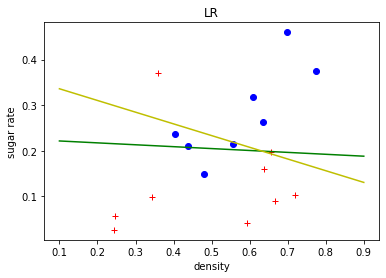

In [30]:
if __name__=="__main__":
 
    #read data from csv file
    workbook = pd.read_csv("../ml_exercise-master/data/3.0a.csv")
    workbook.head(5)
    workbook.insert(3, "3", 1) # add b
    X = workbook.values[:, 1:-1]
    y = workbook.values[:, 4].reshape(-1, 1)

    
    #plot training data
    positive_data = workbook.values[workbook.values[:, 4] == 1.0, :]
    negative_data = workbook.values[workbook.values[:, 4] == 0, :]
    plt.plot(positive_data[:, 1], positive_data[:, 2], 'bo')
    plt.plot(negative_data[:, 1], negative_data[:, 2], 'r+')
    
    #get optimal params beta with newton method
    beta = Newton(X, y)
    newton_left = -( beta[0, 0]*0.1 + beta[0, 2] ) / beta[0, 1]
    newton_right = -( beta[0, 0]*0.9 + beta[0, 2] ) / beta[0, 1]
    plt.plot([0.1, 0.9], [newton_left, newton_right], 'g-')
 
    #get optimal params beta with gradient descent method
    # 让密度x都为[0.1,0.9],分别计算左右极值对应的含糖量y
    beta = gradDescent(X, y)
    grad_descent_left = -( beta[0, 0]*0.1 + beta[0, 2] ) / beta[0, 1]
    grad_descent_right = -( beta[0, 0]*0.9 + beta[0, 2] ) / beta[0, 1]
    plt.plot([0.1, 0.9], [grad_descent_left, grad_descent_right], 'y-')
 
    plt.xlabel('density')
    plt.ylabel('sugar rate')
    plt.title("LR")
    plt.show()

In [35]:
print(beta)

[[ 0.91815069  3.5780256  -1.29448202]]
